<a href="https://colab.research.google.com/github/ananyadix/fashion-MNIST/blob/main/fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [2]:
from tensorflow.keras import datasets,models,layers
import matplotlib.pyplot as plt

In [3]:
fashion_mnist=datasets.fashion_mnist

In [4]:
(train_image,train_lable),(test_image,test_lable)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [5]:
type(train_image)

numpy.ndarray

In [6]:
type(train_lable)

numpy.ndarray

In [7]:
print(len(train_image))

60000


In [8]:
print(len(train_lable))

60000


In [9]:
print(train_image[0].shape)

(28, 28)


In [10]:
print(train_image[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

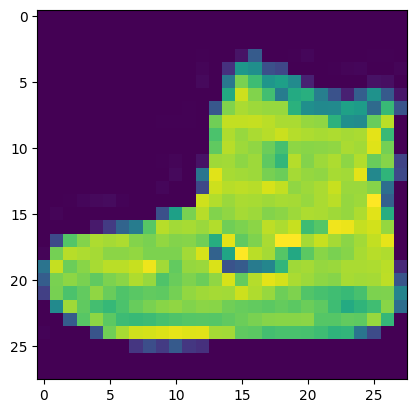

In [11]:
plt.imshow(train_image[0])
plt.show()

In [12]:
print(train_lable[0])

9


In [13]:
train_image,test_image=train_image/255.0,test_image/255.0

In [14]:
print(train_image[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [15]:
train_image=train_image.reshape(train_image.shape[0],28,28,1)
test_image=test_image.reshape(test_image.shape[0],28,28,1)

In [16]:
train_image.shape

(60000, 28, 28, 1)

In [17]:
test_image.shape

(10000, 28, 28, 1)

In [21]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [22]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [23]:
history=model.fit(train_image,train_lable,epochs=10,validation_data=(test_image,test_lable))

Epoch 1/10
1875/1875 [==============================] - 14s 5ms/step - loss: 0.4900 - accuracy: 0.8202 - val_loss: 0.3670 - val_accuracy: 0.8682
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3179 - accuracy: 0.8832 - val_loss: 0.3177 - val_accuracy: 0.8835
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2696 - accuracy: 0.9006 - val_loss: 0.2934 - val_accuracy: 0.8950
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2381 - accuracy: 0.9116 - val_loss: 0.2673 - val_accuracy: 0.9006
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2183 - accuracy: 0.9193 - val_loss: 0.2739 - val_accuracy: 0.9017
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1962 - accuracy: 0.9277 - val_loss: 0.2628 - val_accuracy: 0.9097
Epoch 7/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1802 - accuracy: 0.9330 - val_loss: 0.2657 - val_accuracy

In [24]:
test_loss,test_acc=model.evaluate(test_image,test_lable,verbose=2)
print('Test accuracy:',test_acc)

313/313 - 1s - loss: 0.2902 - accuracy: 0.9081 - 804ms/epoch - 3ms/step
Test accuracy: 0.9081000089645386


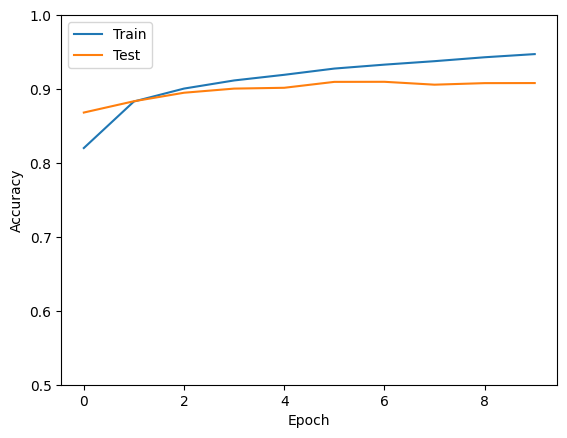

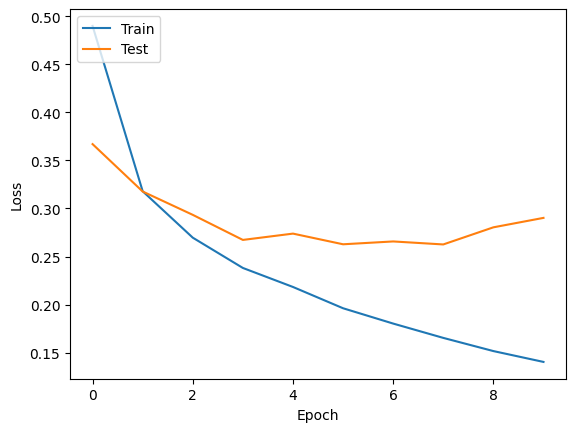

In [25]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(['Train','Test'],loc='upper left')
plt.show()

plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

In [27]:
model.save('fashion_MNIST.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
